In [1]:
import pandas as pd

#Create usefull dataframe
New_weather_steps = pd.read_csv("C:\\Users\\irene\\OneDrive\\Bureaublad\\ML\\ML4QS\\datacheck.csv")
New_weather_steps = New_weather_steps.drop(["Unnamed: 0"] ,axis=1)
#New_steps = weather_steps[['start', 'value_steps']]
#New_weather = weather_steps.iloc[:, 7:35]
#New_weather_steps = pd.concat([New_steps, New_weather], axis=1)

#Create new column with steps as integers
New_weather_steps["int_steps"] = New_weather_steps["value_steps"].astype(int)

display(New_weather_steps)

,Unnamed: 0.1,start,end,value_steps,value_heart,value_workout,combined,int_steps
0,0,2022-01-01 00:00:00,2022-01-01 00:10:00,38.841808,82.0,no workout,Chilly0,38
1,1,2022-01-01 00:10:00,2022-01-01 00:20:00,156.509531,77.5,no workout,Chilly0,156
2,2,2022-01-01 00:20:00,2022-01-01 00:30:00,97.817536,78.5,no workout,Chilly0,97
3,3,2022-01-01 00:30:00,2022-01-01 00:40:00,53.407172,73.5,no workout,Chilly0,53
4,4,2022-01-01 00:40:00,2022-01-01 00:50:00,0.000000,75.5,no workout,Chilly0,0
...,...,...,...,...,...,...,...,...
75020,75020,2023-06-05 23:20:00,2023-06-05 23:30:00,0.000000,60.5,no workout,Chilly0,0
75021,75021,2023-06-05 23:30:00,2023-06-05 23:40:00,0.000000,61.0,no workout,Chilly0,0
75022,75022,2023-06-05 23:40:00,2023-06-05 23:50:00,0.000000,61.0,no workout,Chilly0,0
75023,75023,2023-06-05 23:50:00,2023-06-06 00:00:00,0.000000,61.0,no workout,Chilly0,0


In [2]:
print(New_weather_steps.isna().sum())

Unnamed: 0.1         0
start                0
end                  0
value_steps          0
value_heart      48819
value_workout        0
combined             0
int_steps            0
dtype: int64


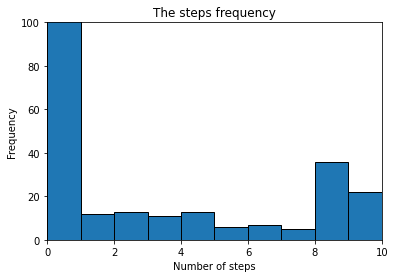

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

data = New_weather_steps['int_steps']
bin_width = 1

# Calculate the bin edges
bin_edges = np.arange(min(data), max(data) + bin_width, bin_width)

ax.hist(data, bins=bin_edges, edgecolor='black')

# Set x-axis and y-axis labels
ax.set_xlabel('Number of steps')
ax.set_ylabel('Frequency')

# Set the title of the plot
ax.set_title('The steps frequency')
ax.set_xlim(0, 10)
ax.set_ylim(0, 100)

plt.show()

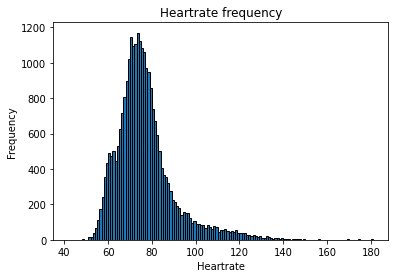

In [4]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()

data = New_weather_steps['value_heart']
bin_width = 1

# Calculate the bin edges
bin_edges = np.arange(min(data), max(data) + bin_width, bin_width)

ax.hist(data, bins=bin_edges, edgecolor='black')

# Set x-axis and y-axis labels
ax.set_xlabel('Heartrate')
ax.set_ylabel('Frequency')

# Set the title of the plot
ax.set_title('Heartrate frequency')
#ax.set_xlim(0, 10)
#ax.set_ylim(0, 100)

plt.show()

In [92]:
#frequency of number of steps
print(len(New_weather_steps[New_weather_steps['steps']<=0]))
print(len(New_weather_steps[New_weather_steps['steps']<=600])- len(New_weather_steps[New_weather_steps['steps']<=500]))

21304
19


In [5]:
#Heel vaag. Eerst deed hij het wel goed (degene in overleaf), maar nu geeft hij een hele gekke grafiek

dates = New_weather_steps['start']
values = New_weather_steps['value_steps']

fig, ax = plt.subplots()
ax.plot(dates, values)

# Set the number of desired ticks
num_ticks = 50

# Calculate the step size to evenly distribute the ticks
step = len(dates) // (num_ticks - 1)

ax.set_xlabel('Date')
ax.set_ylabel('Number of steps')
ax.set_title('the number of steps over time')


plt.show()

KeyboardInterrupt: 

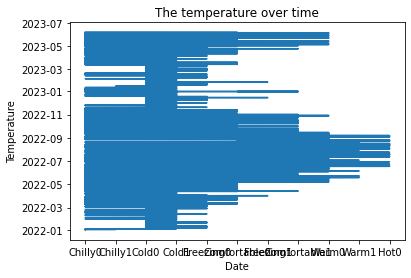

In [8]:
# Convert 'startDate' column to datetime objects
New_weather_steps['start'] = pd.to_datetime(New_weather_steps['start'])

dates = New_weather_steps['start']
values = New_weather_steps['combined']

fig, ax = plt.subplots()
ax.plot(dates, values)

# Set the number of desired ticks
num_ticks = 5

# Calculate the step size to evenly distribute the ticks
step = len(dates) // (num_ticks - 1)

ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('The temperature over time')


plt.show()

In [9]:
#Ik dacht misschien iets met pearson's correlation test, dus deze functie had ik uit de Python3Code gehaald. 
#Hij moet nog aangepast worden op onze set
from scipy.stats import pearsonr
from operator import itemgetter
import numpy as np

def pearson_selection(max_features, X_train, y_train):
    correlations = []
    full_columns_and_corr = []
    abs_columns_and_corr = []

    # Compute the absolute correlations per column.
    for i in range(0, len(X_train.columns)):
        corr, p = pearsonr(X_train[X_train.columns[i]], y_train)
        correlations.append(abs(corr))
        if np.isfinite(corr):
            full_columns_and_corr.append((X_train.columns[i], corr))
            abs_columns_and_corr.append((X_train.columns[i], abs(corr)))

    sorted_attributes = sorted(abs_columns_and_corr,key=itemgetter(1), reverse=True)
    res_list = [x[0] for x in sorted_attributes[0:max_features]]

    # And return the most correlated ones.
    return res_list, sorted(full_columns_and_corr,key=itemgetter(1), reverse=True)

In [2]:
New_weather_steps.to_csv('New_weather_steps.csv')

In [10]:
print(New_weather_steps['combined'].value_counts())

Cold0           25710
Chilly0         15241
Comfortable0    10920
Cold1            7758
Chilly1          4602
Warm0            4584
Freezing0        2976
Comfortable1     1452
Hot0             1434
Warm1             258
Freezing1          90
Name: combined, dtype: int64
